# ODE exercise 1:
The differential equation $\frac{dy(t)}{dt} = 3t^2 + \sin(t)$ with initial condition $y(0) = 2$.

(a) Find the analytical solutions using sympy.

(b) Approximate the solution to this initial value problem between 0 and 3 in increments of 0.1 and 0.01 using the Explicit, Implicit and Trapezoidal Euler Formulae.

(c) Plot the difference between the approximated solutions and the exact solution. 

In [1]:
#Part a
import numpy as np
import matplotlib.pyplot as plt

import sympy as sp
from sympy import sin

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [2]:
# Define symbols

y = sp.symbols("y", cls = sp.Function)
t = sp.symbols("t")

In [3]:
# Define ODE

diffeq = sp.Eq(y(t).diff(t)- 3*t**2 - sin(t), 0)

display(diffeq)

Eq(-3*t**2 - sin(t) + Derivative(y(t), t), 0)

In [4]:
# Solve the ODE:

result = sp.dsolve(diffeq, y(t), ics = {y(0):2})

display(result)

Eq(y(t), t**3 - cos(t) + 3)

### Plotting:

In [5]:
# Define function f(t)

b = 3

y_t = lambda t: t**3 - np.cos(t) + 3 # this is y(t)

# Spacing
h_1 = 0.1
h_2 = 0.01

# t_axis

t_1 = np.arange(0, b + h_1, h_1)
t_2 = np.arange(0, b + h_2, h_2)

# Initial conditions
y0 = 2.

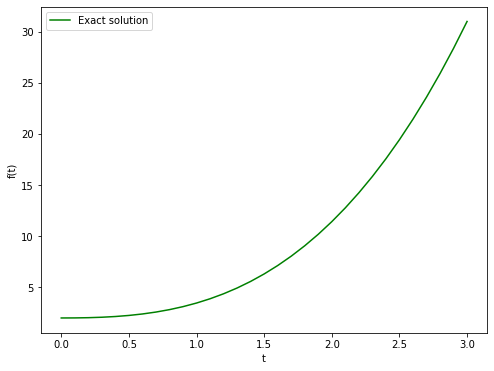

In [8]:
# Plotting

plt.figure(figsize = (8,6))

plt.plot(t_1, y_t(t_1), "g", label = "Exact solution")

plt.xlabel('t')
plt.ylabel('f(t)')

#plt.xlim(-2.0,2.0)
#plt.ylim(-20,20)

plt.legend()
plt.show()

In [6]:
#Define Slope

def f_ode(t, y):
    return 3*t**2 + np.sin(t)

In [20]:
# Part b

# Functions to carry out Euler integration

def explicit_euler(t_axis, h_step):
    # define the solution vector
    y_sln = np.zeros(len(t_axis)) # associated with h_1

    # Assign Initial Condition
    y_sln[0] = y0

    # ODE integration
    for k in range(0, len(t_axis) - 1):
        y_sln[k + 1] = y_sln[k] + h_step*f_ode(t_axis[k], y_sln[k])

    return y_sln


def implicit_euler(t_axis, h_step):
    
    # define the y_sln vectors
    y_sln = np.zeros(len(t_axis)) # associated with h

    # add initial conditions
    y_sln[0] = y0

    # loop to fill up y_sln
    for k in range(0, len(t_axis) - 1):
        #print(y_sln[k + 1])
        y_sln[k + 1] = y_sln[k] + h_step*f_ode(t_axis[k + 1], y_sln[k + 1])
        #print(y_sln)
        
    return y_sln


def trapezoidal_euler(t_axis, h_step):
    
    # define the y_sln vectors
    y_sln = np.zeros(len(t_axis)) # associated with h

    # add initial conditions
    y_sln[0] = y0

    # loop to fill up y_sln
    for k in range(0, len(t_axis) - 1):
        y_sln[k + 1] = y_sln[k] + h_step*(f_ode(t_axis[k], y_sln[k]) + f_ode(t_axis[k + 1], y_sln[k + 1]))/2
        
    return y_sln

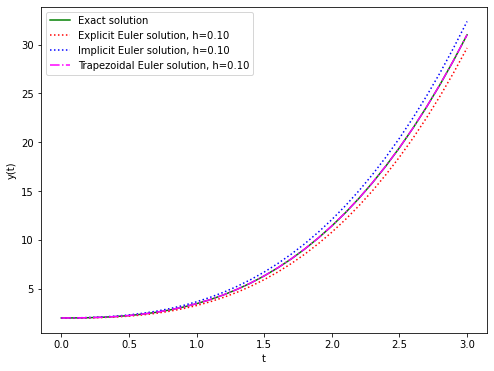

In [22]:
plt.figure(figsize = (8,6))

plt.plot(t_1, y_t(t_1), "g", label = "Exact solution")
plt.plot(t_1, explicit_euler(t_1, h_1), "r", linestyle =':', label = "Explicit Euler solution, h=0.10")
plt.plot(t_1, implicit_euler(t_1, h_1), "b", linestyle =':', label = "Implicit Euler solution, h=0.10")
plt.plot(t_1, trapezoidal_euler(t_1, h_1), "magenta", linestyle ='-.', label = "Trapezoidal Euler solution, h=0.10")

plt.xlabel('t')
plt.ylabel('y(t)')

plt.legend()

plt.show()

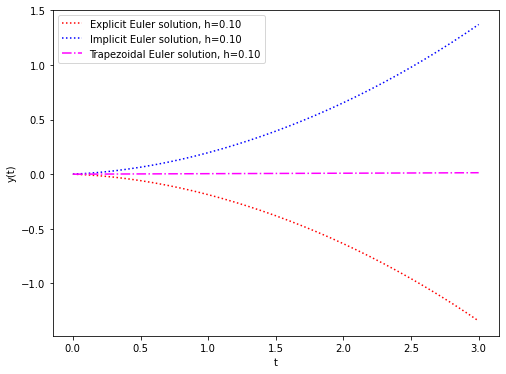

In [23]:
plt.figure(figsize = (8,6))

#plt.plot(t_1, y_t(t_1), "g", label = "Exact solution")
plt.plot(t_1, explicit_euler(t_1, h_1) - y_t(t_1), "r", linestyle =':', label = "Explicit Euler solution, h=0.10")
plt.plot(t_1, implicit_euler(t_1, h_1) - y_t(t_1), "b", linestyle =':', label = "Implicit Euler solution, h=0.10")
plt.plot(t_1, trapezoidal_euler(t_1, h_1) - y_t(t_1), "magenta", linestyle ='-.', label = "Trapezoidal Euler solution, h=0.10")

plt.xlabel('t')
plt.ylabel('y(t)')

plt.legend()

plt.show()

# ODE exercise 2:

The differential equation $\frac{dy(t)}{dt} = \frac{t-y}{2}$ with initial condition $y(0) = 1$.

(a) Find the analytical solutions using sympy.

(b) Approximate the solution to this initial value problem between 0 and 3 in increments of 0.1 and 0.01 using the Explicit, Implicit and Trapezoidal Euler Formulae.

(c) Plot the difference between the approximated solutions and the exact solution. 

In [7]:
# Part (a)
# Define symbols

y = sp.symbols("y", cls = sp.Function)
t = sp.symbols("t")

In [8]:
# Define ODE

diffeq = sp.Eq(y(t).diff(t) + y(t)/2 - t/2, 0)

display(diffeq)

Eq(-t/2 + y(t)/2 + Derivative(y(t), t), 0)

In [9]:
# Solve the ODE:

result = sp.dsolve(diffeq, y(t), ics = {y(0):1})

display(result)

Eq(y(t), t - 2 + 3*exp(-t/2))

### Plotting:

In [10]:
# Define function f(t)

y_t = lambda t, s: t - 2 + 3*np.exp(-t/2) # this is y(t)

# Spacing
h_1 = 0.1
h_2 = 0.01

# t_axis

t_1 = np.arange(0, 3 + h_1, h_1)
t_2 = np.arange(0, 3 + h_2, h_2)

# Initial conditions
y0 = 1.

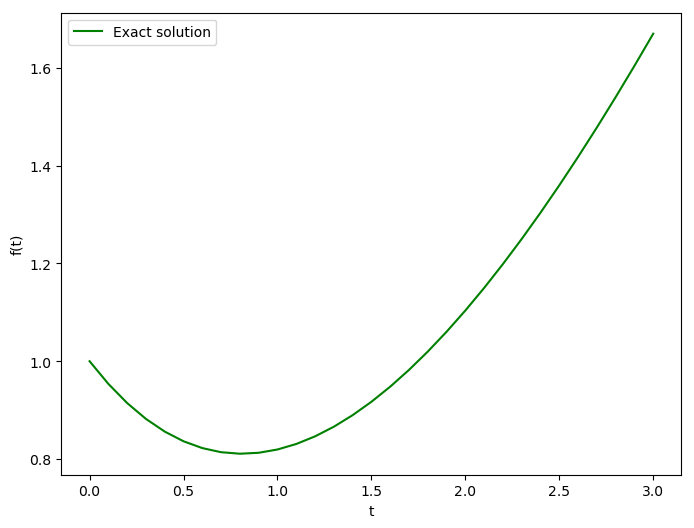

In [11]:
# Plotting

plt.figure(figsize = (8,6))

plt.plot(t_1, y_t(t_1, y0), "g", label = "Exact solution")

plt.xlabel('t')
plt.ylabel('f(t)')

plt.legend()
plt.show()

In [12]:
# Part b 

# Define the slope

def f_ode(t, y):
    return (t - y)/2

### Explicit Euler Method:

We want to implement:

$$
S(t_{j+1}) = S(t_j) + hF(t_j, S(t_j)).
$$

In [13]:
def explicit_euler(t_axis, h_step):
    # define the solution vector
    y_sln = np.zeros(len(t_axis)) # associated with h_1

    # Assign Initial Condition
    y_sln[0] = y0

    # ODE integration
    for k in range(0, len(t_axis) - 1):
        y_sln[k + 1] = y_sln[k] + h_step*f_ode(t_axis[k], y_sln[k])

    return y_sln

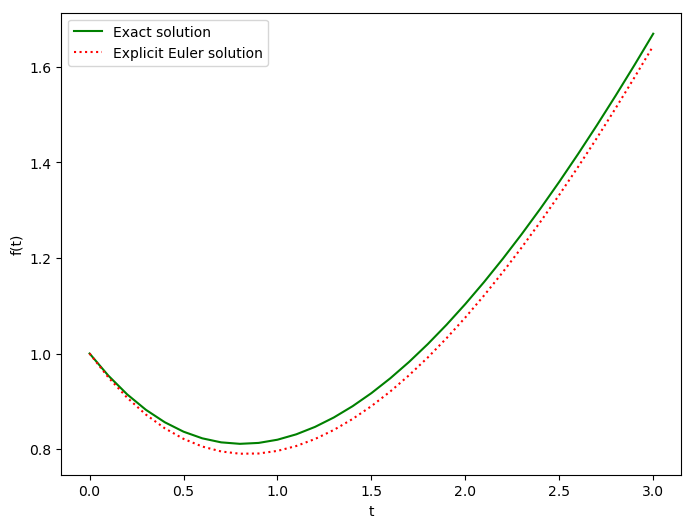

In [15]:
plt.figure(figsize = (8,6))

plt.plot(t_1, y_t(t_1, y0), "g", label = "Exact solution")
plt.plot(t_1, explicit_euler(t_1, h_1), "r", linestyle = ":", label = "Explicit Euler solution")


plt.xlabel('t')
plt.ylabel('f(t)')

plt.legend()
plt.show()



The **Implicit Euler Formula** can be derived by taking the linear approximation of $S(t)$ around $t_{j+1}$ and computing it at $t_j$:

$$
S(t_{j+1}) = S(t_j) + hF(t_{j+1}, S(t_{j+1})).
$$


In [18]:
def implicit_euler(t_axis, h_step):
    
    # define the y_sln vectors
    y_sln = np.zeros(len(t_axis)) # associated with h

    # add initial conditions
    y_sln[0] = y0

    # loop to fill up y_sln
    for k in range(0, len(t_axis) - 1):
        y_sln[k + 1] = y_sln[k] + h_step*f_ode(t_axis[k], y_sln[k])
        y_sln[k + 1] = y_sln[k] + h_step*f_ode(t_axis[k + 1], y_sln[k + 1])
        #print(y_sln)
        
    return y_sln

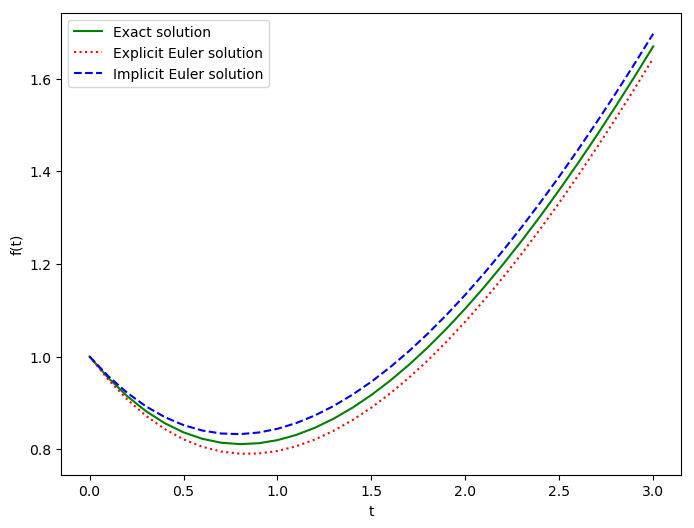

In [19]:
plt.figure(figsize = (8,6))

plt.plot(t_1, y_t(t_1, y0), "g", label = "Exact solution")
plt.plot(t_1, explicit_euler(t_1, h_1), "r", linestyle = ":", label = "Explicit Euler solution")
plt.plot(t_1, implicit_euler(t_1, h_1), "b", linestyle = "--", label = "Implicit Euler solution")

plt.xlabel('t')
plt.ylabel('f(t)')

plt.legend()
plt.show()


In [24]:
def trapezoidal_euler(t_axis, h_step):
    
    # define the y_sln vectors
    y_sln = np.zeros(len(t_axis)) # associated with h

    # add initial conditions
    y_sln[0] = y0

    # loop to fill up y_sln
    for k in range(0, len(t_axis) - 1):
        y_sln[k + 1] = y_sln[k] + h_step*f_ode(t_axis[k], y_sln[k])
        y_sln[k + 1] = y_sln[k] + h_step*(f_ode(t_axis[k], y_sln[k]) + f_ode(t_axis[k + 1], y_sln[k + 1]))/2
        
    return y_sln

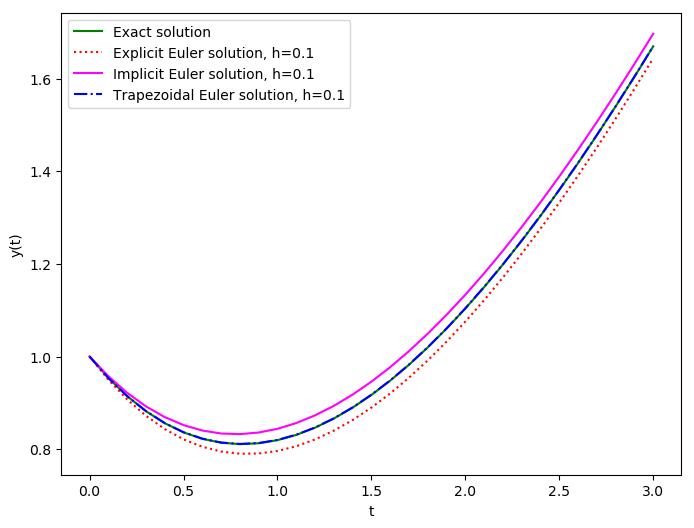

In [25]:
plt.figure(figsize = (8,6))

plt.plot(t_1, y_t(t_1, y0), "g", label = "Exact solution")
plt.plot(t_1, explicit_euler(t_1, h_1), "r", linestyle =':', label = "Explicit Euler solution, h=0.1")
plt.plot(t_1, implicit_euler(t_1, h_1), "magenta", linestyle ='-', label = "Implicit Euler solution, h=0.1")
plt.plot(t_1, trapezoidal_euler(t_1, h_1), "b", linestyle ='-.', label = "Trapezoidal Euler solution, h=0.1")

plt.xlabel('t')
plt.ylabel('y(t)')

plt.legend()
plt.show()

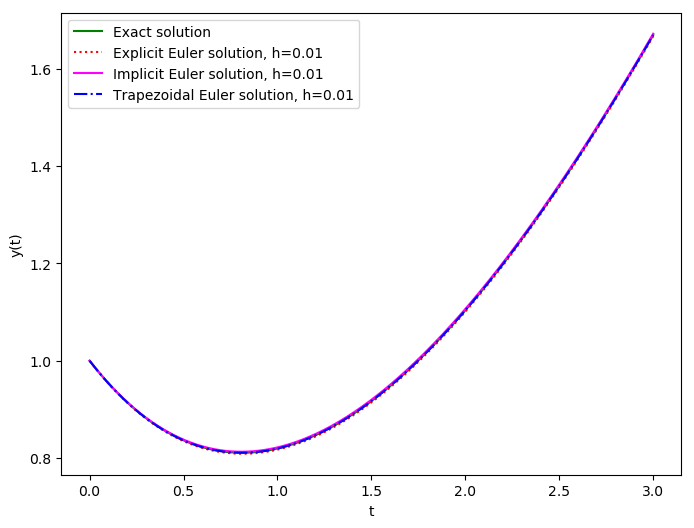

In [27]:
plt.figure(figsize = (8,6))

plt.plot(t_2, y_t(t_2, y0), "g", label = "Exact solution")
plt.plot(t_2, explicit_euler(t_2, h_2), "r", linestyle =':', label = "Explicit Euler solution, h=0.01")
plt.plot(t_2, implicit_euler(t_2, h_2), "magenta", linestyle ='-', label = "Implicit Euler solution, h=0.01")
plt.plot(t_2, trapezoidal_euler(t_2, h_2), "b", linestyle ='-.', label = "Trapezoidal Euler solution, h=0.01")

plt.xlabel('t')
plt.ylabel('y(t)')

plt.legend()
plt.show()